# Шаблон для проекта по A/B - тестам.

### `chat_id ` из Телеграма:

In [ ]:
chat_id = 461750643

------------------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/data_science/datasets"

Mounted at /content/drive


##  <ins>Задание 1.</ins>

Контекст:
Мы считаем, что наш продукт достаточно дорогой для клиента.
У нас есть гипотеза, что уменьшение цены продукта
позволит повысить частоту продаж
и суммарно увеличит доходность продукта.
        
Тест:
Мы проводим тест,
в рамках которого контролем является
продажа продукта со старой ценой,
а тестом - продажа продукта с новой ценой.
Целью этого теста
является проверка гипотезы роста доходности
нашего продукта из-за уменьшения тарифа.

Статистические вводные:
Уровень значимости 5%.
Мы хотели бы различать 5%-ное
изменение целевой метрики
с вероятностью 80%.

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [ ]:
df1 = pd.read_csv(way + 'hist_telesales.csv')

In [ ]:
df1 = df1.rename({'Флаг дозвона' : 'call_flag', 'Флаг продажи' : 'sale_flag', 'Расходы' : 'expensess'}, axis = 1)

In [ ]:
df1.head(10)

,ID,call_flag,sale_flag,expensess,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22
5,5,1,1,367,2397,2030
6,6,1,1,49,1213,1164
7,7,0,0,26,0,-26
8,8,0,0,35,0,-35
9,9,0,0,61,0,-61


In [ ]:
df1.sum()

ID           2603568880
call_flag         43288
sale_flag         21805
expensess      14474165
PV             34784586
NPV            20310421
dtype: int64

В качестве метрики подошла бы общая выручка, если бы мы были уверены, что количество людей примерно такое же. Так как в этом нельзя быть увереным, то лучше подойдет одна из двух метрик: конверсия в покупку или средняя прибыль с клиента. Так как нам все-таки важны и траты на клиентов, то я выбрал в качестве метрики среднюю прибыль с клиента. Повторю главные преимущества:
1) Не зависит от количества людей в выборке
2) Учитывает и траты, и доходы.

Можно использовать медианное значение, но оно будет хуже передавать общий размер прибыли

### 2. Альтернатива в критерии.

H0 (нулевая гипотеза): средняя прибыль на пользователя при старой цене равна или больше средней прибыли на пользователя при новой цене.

H1 (альтернативная гипотеза): средняя прибыль на пользователя при старой цене меньше средней прибыли на пользователя при новой цене.

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Воспользуемся формулой n = (Zα/2 + Zβ)^2 * (p1 * (1 - p1) + p2 * (1 - p2)) / (p2 - p1)^2,

где p1 - вероятность конверсии, p2 - нужная вероятность конверсии, Za - оценка, соответствующая уровню значимости α (1.96) Zβ - оценка, соответствующая статистической мощности 1-β (для 80% - 84)

Также перепроверим в калькуляторе: 

https://www.evanmiller.org/ab-testing/sample-size.html#!50;80;5;5;1



In [ ]:
#считаем базовый уровень конверсии
sale_conv = df1.loc[df1['sale_flag'] == 1].shape[0]
call_conv = df1.loc[df1['call_flag'] == 1].shape[0]
base_conv_rate = sale_conv / call_conv
base_conv_rate

0.503719275549806

In [ ]:
#MDE = 0.05
n = 6428

Получаем n = 6277 на сайте и 6428 по формуле. Возьмем второе значение

### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
#Код выборки: 36737.

In [ ]:
testdf1 = pd.read_csv(way + 'testAB1.csv')
contdf1 = pd.read_csv(way + 'controlAB1.csv')

In [ ]:
testdf1 = testdf1.rename({'Флаг дозвона' : 'call_flag', 'Флаг продажи' : 'sale_flag', 'Расходы' : 'expensess'}, axis = 1)
contdf1 = contdf1.rename({'Флаг дозвона' : 'call_flag', 'Флаг продажи' : 'sale_flag', 'Расходы' : 'expensess'}, axis = 1)

In [ ]:
testdf1.head(5)

,ID,call_flag,sale_flag,expensess,PV,NPV
0,0,0,0,20,0,-20
1,1,0,0,12,0,-12
2,2,1,1,196,1424,1228
3,3,1,0,2,0,-2
4,4,1,0,78,0,-78


In [ ]:
contdf1.head(5)

,ID,call_flag,sale_flag,expensess,PV,NPV
0,0,0,0,89,0,-89
1,1,1,0,114,0,-114
2,2,1,1,147,1246,1099
3,3,1,0,3,0,-3
4,4,1,0,18,0,-18


In [ ]:
print(contdf1.shape, testdf1.shape)

(6428, 6) (6428, 6)


<Axes: xlabel='NPV', ylabel='Density'>

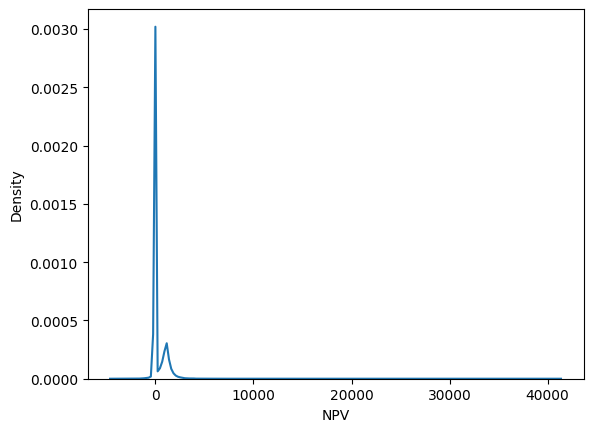

In [ ]:
sns.kdeplot(df1['NPV'], bw_method='scott', label='KDE')

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest


print(shapiro(df1['NPV']))
print(kstest(df1['NPV'], 'norm'))

ShapiroResult(statistic=0.635492205619812, pvalue=0.0)
KstestResult(statistic=0.674084200719773, pvalue=0.0, statistic_location=-3, statistic_sign=1)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Pvalue равен 0, значит распределения не нормальное

In [ ]:
from scipy.stats import mannwhitneyu

alpha = 0.05

stat, p_value = mannwhitneyu(contdf1['NPV'], testdf1['NPV'])

if (p_value < alpha and stat > 0): 
  print('mannwhitneyu - вводим')
else :
  print('mannwhitneyu - не вводим')
print(stat, p_value)

mannwhitneyu - не вводим
20474993.5 0.3802854886206185


In [ ]:
from scipy.stats import wilcoxon

alpha = 0.05

stat, p_value = wilcoxon(contdf1['NPV'], testdf1['NPV'])

if (p_value < alpha and stat > 0): 
  print('wilcoxon - вводим')
else :
  print('wilcoxon - не вводим')
print(stat, p_value)

wilcoxon - не вводим
10117636.5 0.3897511008924568


На всякий случай проверим еще и нормальное распределение

In [ ]:
from scipy.stats import ttest_ind_from_stats

n = 6428
control_mean = contdf1['NPV'].mean()
test_mean = testdf1['NPV'].mean()

control_std = contdf1['NPV'].std()
test_std = testdf1['NPV'].std()

alpha = 0.05

t_stat, p_value = ttest_ind_from_stats(mean1=test_mean, std1=test_std, nobs1=n,
                                       mean2=control_mean, std2=control_std, nobs2=n)

if (p_value < alpha and t_stat > 0): 
  print('ttest - вводим')
else :
  print('ttest - не вводим')
print(t_stat, p_value)

ttest - не вводим
1.1302212098527047 0.2584041134799226


In [ ]:
from scipy.stats import ks_2samp

alpha = 0.05
val = ks_2samp(contdf1['NPV'], testdf1['NPV'])
if (val.pvalue < alpha and val.statistic > 0): 
  print('ks_2samp - вводим')
else :
  print('ks_2samp - не вводим')

ks_2samp - не вводим


In [ ]:
print(contdf1['NPV'].sum(), testdf1['NPV'].sum())

1744723 1831082


In [ ]:
print(contdf1['NPV'].mean(), testdf1['NPV'].mean())

271.42548226509024 284.8602986932172


In [ ]:
testdf1['NPV'].mean() / contdf1['NPV'].mean()

1.0494972554382558

In [ ]:
testdf1['NPV'].median() / contdf1['NPV'].median()

1.0277777777777777

### 4. Принятие решения. Расписать подробно с аргументами.

Из тестов видно, что изменение внедрять не следует. Оно дает некоторый рост выручки и не роняет контрольные метрики (общая прибыль), но при этом также не дает нужного нам статзначимого изменения этих показателей. Причем все тесты в этом единодушны. Я также провел hyppo.independence.Hsic тест, который показал тот же самый результат, но я случайно удалил этот тест.

Стоит отметить еще раз, что все же некоторый результат есть. Это значит, что если провести еще несколько тестов или поэкспериментировать со скидкой, то возможно получится добиться значимого результата.

------------------

##  <ins>Задание 2.</ins>

Контекст
ЦБ смягчило правило,
ограничивающее варианты продажи услуги.
Мы хотим попробовать
более агрессивную продажу услуги,
но боимся,
что это повлияет на экономику основного продукта (КК)
из-за негатива клиентов.

Тест
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать услугу текущим способом,
а второй части (тесту) - новым более агрессивным способом.
Целью этого теста 
является увеличение доходности КК + услуги.

Статистические вводные
Проверка однородности выбранного параметра
осуществяется с уровнем значимости 2%.

Уровень значимости 5%.
Мы хотели бы различать 3%-ное
изменение целевой метрики
с вероятностью 85%.

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

In [ ]:
df2 = pd.read_csv(way + 'hist_credit_card.csv')

In [ ]:
df2 = df2.rename({'Возраст' : 'age',	'Доход клиента' : 'income',	'Вероятность банкротства' : 'bankrupt_chance', \
            'Флаг утилизации счёта' : 'account_delete_flag',	'Расходы' : 'expnses', 	'PV КК' : 'PV_kk',	'PV услуги' : 'PV_service'}, axis = 1)

In [ ]:
df2.head(10)

,ID,age,income,bankrupt_chance,account_delete_flag,expnses,PV_kk,PV_service,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759
5,5,19,22957.947147,0.021514,1,110,33316,1692,34898
6,6,27,22217.477344,0.319460,0,57,0,0,-57
7,7,46,29584.430233,0.324886,1,371,5859,2529,8017
8,8,27,21730.692059,0.254344,1,712,9981,3758,13027
9,9,41,34909.175512,0.017871,1,131,8794,5315,13978


### 1. Необходимо выбрать метрику и привести аргументацию.

Т.к. нам нужно повысить конечную доходоность, то нужно считать какую-то функцию от NPV, т.к. нам важна общая доходность, то лучшей метрикой будет выступать среднее по этому столбцу.

### 2. Альтернатива в критерии.

Выдвигаем гипотезу H0: средняя прибыль на пользователя при старом подходе равна или больше средней прибыли на пользователя при новой цене.

Альтернативная гипотеза H1 в таком случае: средняя прибыль на пользователя при старом подходе меньше средней прибыли на пользователя при новой цене.


### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

На целевую метрику из таблицы влияют расходы, доход на клиента с услуг и с продажи главного товара. Т.к. нащ показатель является их суммой

Если говорить об абстрактных параметрах, то на метрику также влиют:

1)Удержание клиентов, т.к. постоянный клиент приносит прибыль регулярно

2)Средние расходы на привлечение клиента и его удержание, т.к. это затраты вычитающиеся из выручки

3)Стоимость поддержания инфраструктуры


### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

Воспользуемся формулой n = m = q^2(z_(1-α/2) + z_β)^2 / (k*MDE^2)

k = 0.5 и n = m потому что у нас одинаковое разбиение на тестовую и контроьную

In [ ]:
z_a = 1.96 # z_(1-a/2) = 1.96
z_b = 1.04
mde = 0.03
q = df2['NPV'].var() / df2['NPV'].mean() # нормированная дисперсия
n = (q * (z_a + z_b) ** 2) / (0.5 * (mde))
n

33184075.73146237

Получается слишком большое число (поэтому я не пользовался этой формулой в предудщем задании). К сожалению, не знаю чем это можно объяснить. Считаем через конверсию (n = (Zα/2 + Zβ)^2 * (p1 * (1 - p1) + p2 * (1 - p2)) / (p2 - p1)^2)

In [ ]:
sale_conv2 = df2.loc[df2['NPV'] > 0].shape[0]
call_conv2 = df2.shape[0]
base_conv_rate2 = sale_conv2 / call_conv2
base_conv_rate2

0.7415439535921463

Нашими вычислениями получаем n = 6824. Также проверяем через калькулятор: https://www.evanmiller.org/ab-testing/sample-size.html#!74;85;5;3;1

Он выдает n = 7074, что довольно близко к нашему значению, но чуть больше. Берем значение калькулятора.

In [ ]:
n2 =7074

### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
#код выборки: 36689
sample_code2 = 36689

In [ ]:
testdf2 = pd.read_csv(way + 'testAB2.csv')
contdf2 = pd.read_csv(way + 'controlAB2.csv')

In [ ]:
testdf2 = testdf2.rename({'Возраст' : 'age',	'Доход клиента' : 'income',	'Вероятность банкротства' : 'bankrupt_chance', \
            'Флаг утилизации счёта' : 'account_delete_flag',	'Расходы' : 'expnses', 	'PV КК' : 'PV_kk',	'PV услуги' : 'PV_service'}, axis = 1)
contdf2 = contdf2.rename({'Возраст' : 'age',	'Доход клиента' : 'income',	'Вероятность банкротства' : 'bankrupt_chance', \
            'Флаг утилизации счёта' : 'account_delete_flag',	'Расходы' : 'expnses', 	'PV КК' : 'PV_kk',	'PV услуги' : 'PV_service'}, axis = 1)

In [ ]:
testdf2.head(10)

,ID,age,income,bankrupt_chance,account_delete_flag,expnses,PV_kk,PV_service,NPV
0,0,36,21383.865752,0.013802,1,214,10875,3430,14091
1,1,18,38613.574012,0.268593,1,1292,8691,2350,9749
2,2,19,20429.264796,0.028089,1,146,6408,2300,8562
3,3,28,32619.420140,0.310430,0,11,0,0,-11
4,4,43,29478.228864,0.038736,0,86,0,0,-86
5,5,36,22308.457617,0.125749,1,1320,4736,3098,6514
6,6,18,23799.006870,0.041340,1,186,5998,3001,8813
7,7,21,22957.828745,0.026342,1,732,7126,2624,9018
8,8,24,20686.176801,0.225716,1,714,4882,2798,6966
9,9,31,52568.633002,0.156125,1,156,5287,2294,7425


In [ ]:
contdf2.head(10)

,ID,age,income,bankrupt_chance,account_delete_flag,expnses,PV_kk,PV_service,NPV
0,0,30,33475.148816,0.333554,0,17,0,0,-17
1,1,27,22742.435629,0.066235,1,117,6328,1554,7765
2,2,57,30050.887903,0.100592,1,655,5997,1438,6780
3,3,59,23305.112745,0.058805,1,1325,6415,1635,6725
4,4,53,40941.651322,0.177200,1,202,6282,1528,7608
5,5,56,23054.365585,0.031405,1,89,6791,1559,8261
6,6,18,25679.253772,0.019486,1,1890,6923,1441,6474
7,7,24,20177.826379,0.004076,1,45,6314,2213,8482
8,8,35,26091.775396,0.020483,1,1228,16522,1800,17094
9,9,72,20356.254930,0.101374,1,212,11268,1751,12807


### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest


print(shapiro(df2['NPV']))
print(kstest(df2['NPV'], 'norm'))

ShapiroResult(statistic=0.13842159509658813, pvalue=0.0)
KstestResult(statistic=0.7415439535921464, pvalue=0.0, statistic_location=2640, statistic_sign=-1)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Выборки снова не имеют нормального распределения. Теперь проверяем их на однородность

In [ ]:
from scipy.stats import wilcoxon

alpha = 0.05

stat, p_value = wilcoxon(contdf2['NPV'], testdf2['NPV'])

if (p_value < alpha): 
  print('wilcoxon - не однородные')
else :
  print('wilcoxon - однородные')
print(stat, p_value)

wilcoxon - однородные
12199413.5 0.07842002867528142


In [ ]:
from scipy.stats import mannwhitneyu

alpha = 0.05

stat, p_value = mannwhitneyu(contdf2['NPV'], testdf2['NPV'])

if (p_value < alpha): 
  print('mannwhitneyu - не однородные')
else :
  print('mannwhitneyu - однородные')
print(stat, p_value)

mannwhitneyu - не однородные
23916536.0 5.47235040610268e-06


Верим второму тесту, т.к. значение p_value в первом тоже не сильно большое. Теперь считаем критерий

In [ ]:
print(contdf2['NPV'].mean(), testdf2['NPV'].mean())
print(testdf2['NPV'].mean() / contdf2['NPV'].mean())

8567.602063895956 8733.278343228725
1.0193375320302203


In [ ]:
print(contdf2['NPV'].sum(), testdf2['NPV'].sum())
print(testdf2['NPV'].sum() / contdf2['NPV'].sum())

60607217 61779211
1.01933753203022


In [ ]:
print(contdf2['NPV'].median(), testdf2['NPV'].median())
print(testdf2['NPV'].mean() / contdf2['NPV'].mean())

7797.5 8290.5
1.0193375320302203


Можно сказать, что изменения есть и они с высокой вероятностью реальны. Также стоит заметить что сами по себе изменения меньше чем на два процента. Из этого можно сделать вывод, что саму агрессивную рекламу применять можно, если нас устраивает рост на 2%.